In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Import dataset

In [58]:
dataset = pd.read_csv('/content/drive/MyDrive/4+1/ML/Final/uniqlo_stock_trainset.csv')
dataset.head(3)

Date   Open   High    Low  Close  Volume  Stock Trading
0  12/30/2016  42120  42330  41700  41830  610000   2.562803e+10
1  12/29/2016  43000  43220  42540  42660  448400   1.918823e+10
2  12/28/2016  43940  43970  43270  43270  339900   1.478067e+10

In [59]:
description = dataset.describe()
description

Open          High           Low         Close        Volume  \
count   1226.000000   1226.000000   1226.000000   1226.000000  1.226000e+03   
mean   33754.416803  34178.784666  33347.903752  33760.583197  7.275556e+05   
std    10813.440409  10936.326802  10695.664102  10815.661389  4.137178e+05   
min    13720.000000  13840.000000  13600.000000  13720.000000  1.391000e+05   
25%    27788.750000  28091.250000  27401.250000  27675.000000  4.873000e+05   
50%    34445.000000  34835.000000  33925.000000  34412.500000  6.260000e+05   
75%    41412.500000  41900.000000  40810.000000  41365.000000  8.267000e+05   
max    61550.000000  61970.000000  60740.000000  61930.000000  4.937300e+06   

       Stock Trading  
count   1.226000e+03  
mean    2.440933e+10  
std     1.526300e+10  
min     3.966140e+09  
25%     1.454097e+10  
50%     2.153772e+10  
75%     3.015922e+10  
max     1.460450e+11

change Date column to right format

In [60]:
import datetime

In [61]:
# input_format = '%m/%d/%Y' # input format
# date_format = '%d/%m/%Y'
# dataset.Date = [datetime.datetime.strptime(d, input_format).strftime(date_format) for d in dataset.Date]
dataset.Date = pd.to_datetime( dataset.Date )

sort the dataset increasing by date -> the lastest value will locate at the end

In [62]:
dataset = dataset.sort_values(by='Date').reset_index(drop=True)

In [63]:
dataset.head(5)

Date   Open   High    Low  Close   Volume  Stock Trading
0 2012-01-04  14050  14050  13700  13720   559100   7.719804e+09
1 2012-01-05  13720  13840  13600  13800   511500   7.030811e+09
2 2012-01-06  13990  14030  13790  13850   765500   1.063561e+10
3 2012-01-10  13890  14390  13860  14390   952300   1.353341e+10
4 2012-01-11  14360  14750  14280  14590  1043400   1.519199e+10

In [64]:
max_open = description.Open[-1]
dataset.dtypes

<ipython-input-64-18fab41c3d14>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_open = description.Open[-1]


Date             datetime64[ns]
Open                      int64
High                      int64
Low                       int64
Close                     int64
Volume                    int64
Stock Trading           float64
dtype: object

In [65]:
import matplotlib.dates as mdates

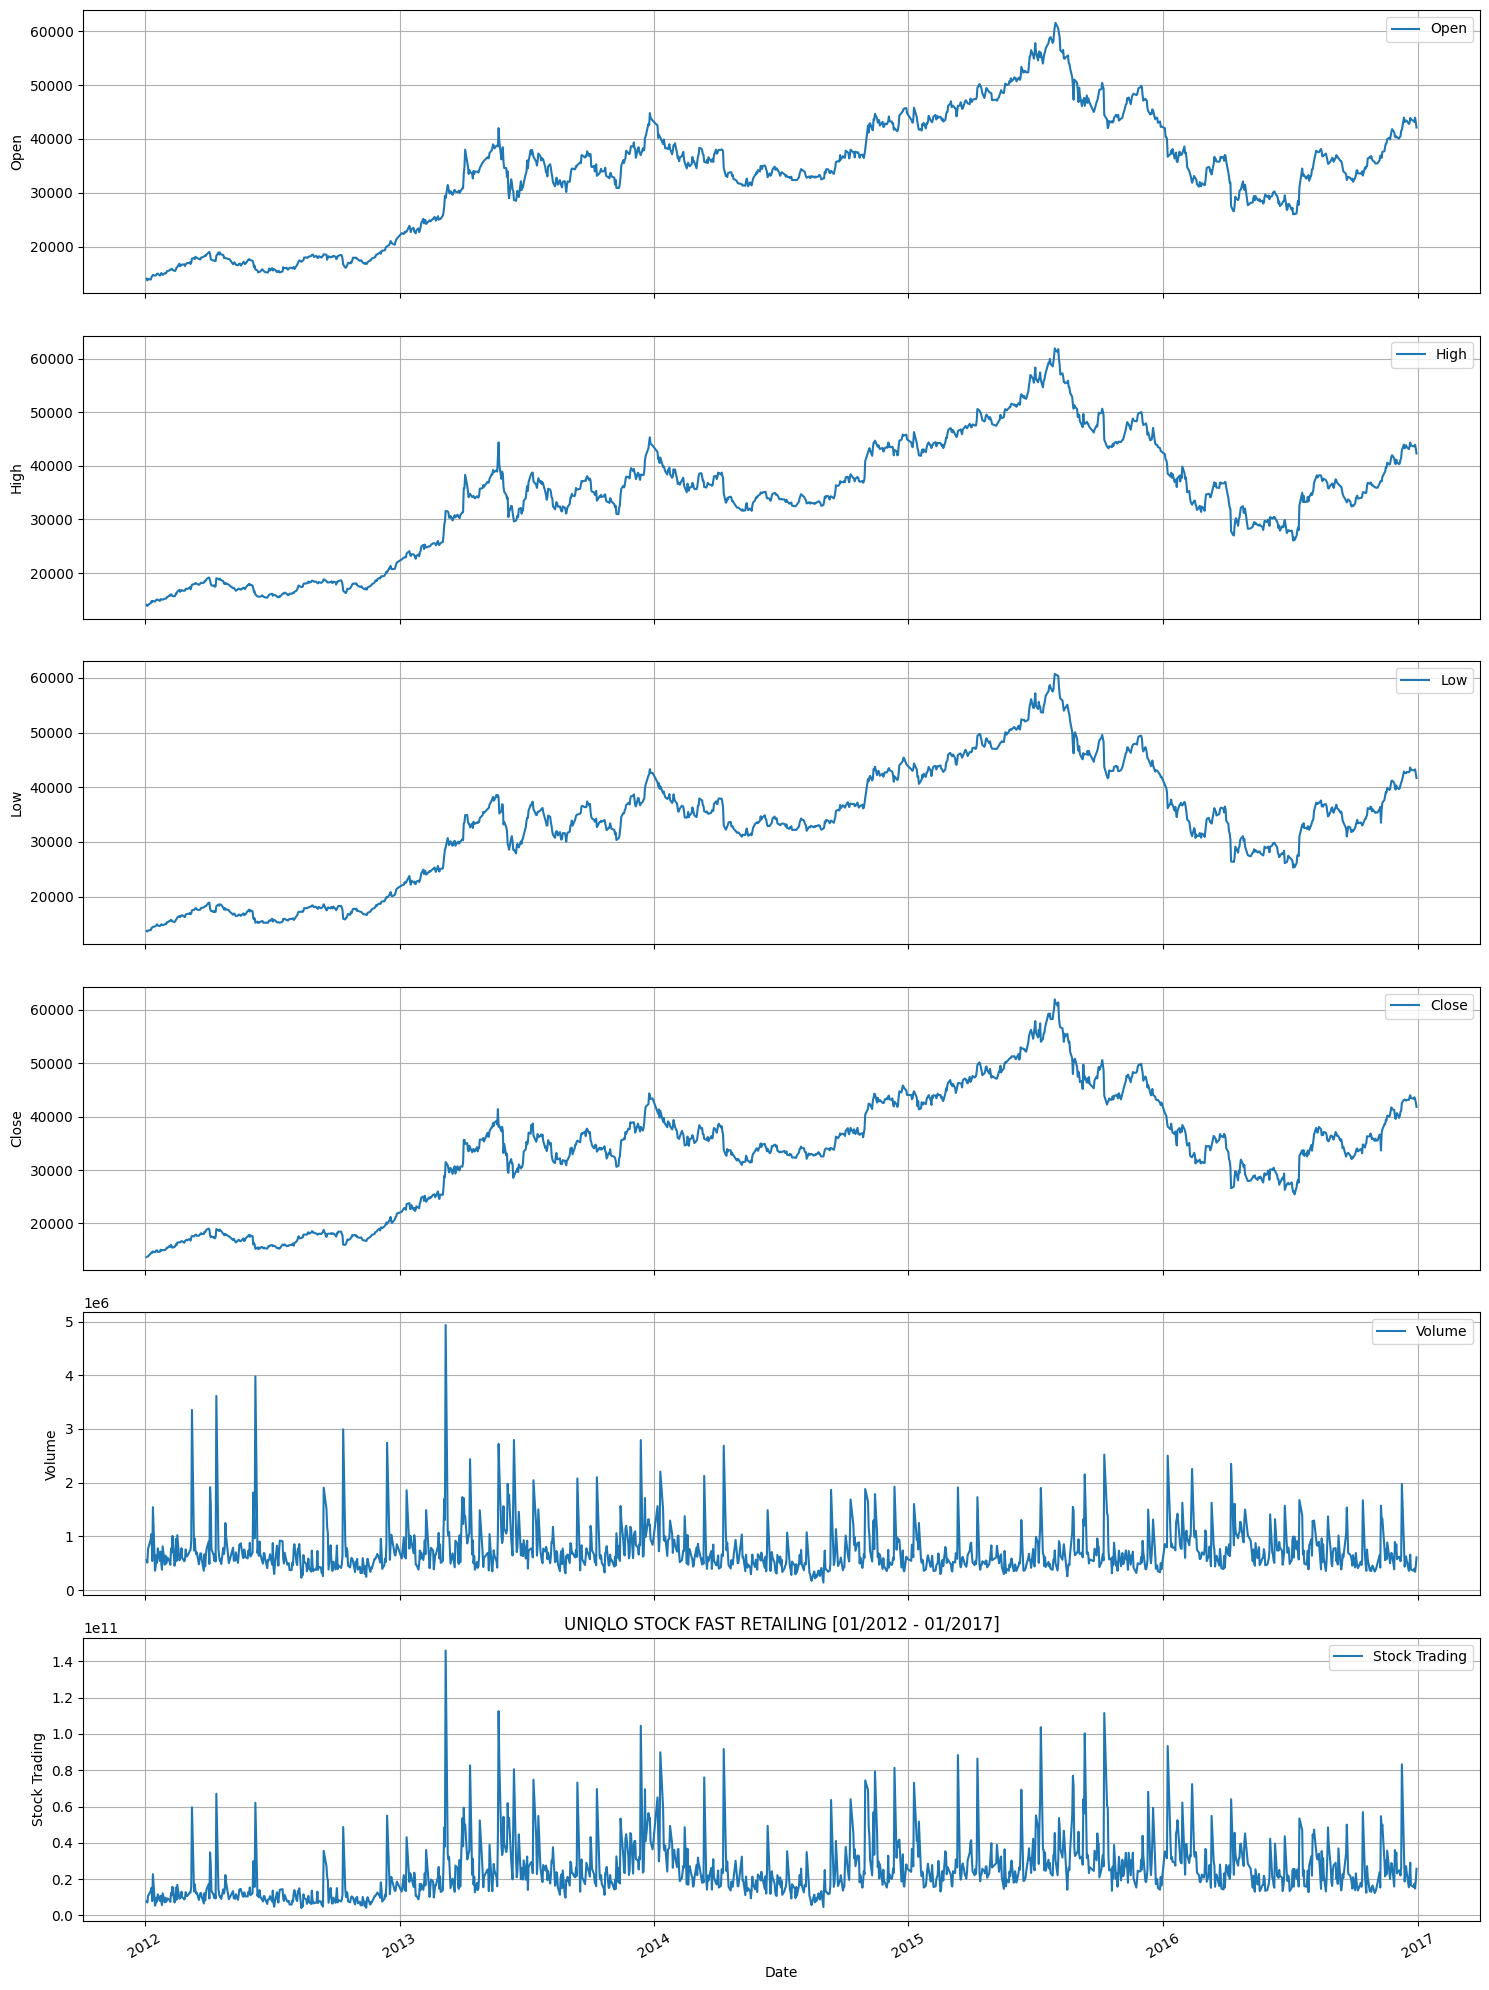

In [66]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 20), sharex=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume','Stock Trading']  # List of features to plot

for i, feature in enumerate(features):
    axs[i].plot(dataset['Date'], dataset[feature], label=feature)
    axs[i].set_ylabel(feature)
    axs[i].grid(True)
    axs[i].legend()

# Set x-axis ticks and rotation for better readability
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.title("UNIQLO STOCK FAST RETAILING [01/2012 - 01/2017]")
plt.tight_layout()
plt.show()


In [67]:
fig, ax = plt.subplots(figsize=[15,5])
# training accuracy
ax.set_title("UNIQLO STOCK FAST RETAILING [01/2012 - 01/2017]")
ax.plot(dataset.Date, dataset.Open, c='blue',label = "stock price")
ax.set_xlabel('time')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax.set_ylabel('stock price')
ax.grid(True)
ax.legend()

# 2.Normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(dataset.iloc[:,1:].values)  # do not include Date column

In [69]:
data_shape = data_scaled.shape
print(data_scaled[:5])
print("shape", data_shape)

[[0.00689944 0.00436318 0.00212134 0.         0.08753282 0.02641958]
 [0.         0.         0.         0.00165941 0.07761244 0.02157021]
 [0.00564499 0.00394764 0.00403055 0.00269654 0.13054896 0.04694202]
 [0.00355425 0.01142738 0.00551549 0.01389753 0.16948022 0.06733777]
 [0.01338072 0.01890713 0.01442512 0.01804605 0.18846651 0.07901139]]
shape (1226, 6)


# 3.Train test split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = []
y = []
dates = []
n_step = 100  # predict
selected_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading']

for i in range(n_step, data_shape[0]):
    X.append(data_scaled[i - n_step:i, :len(selected_features)])  # Selecting multiple features
    y.append(data_scaled[i, 0])  # Considering 'Close' as the predicted value
    dates.append(dataset.Date[i])

X, y = np.array(X), np.array(y)

print(X.shape)
print(y.shape)


(1126, 100, 6)
(1126,)


In [72]:
split_rate = 0.9  # first 90% of time interval is used for training
split_size = (int)(X.shape[0] * split_rate)
X_train,  X_test = X[:split_size,:], X[split_size:,:]
y_train, y_test = y[:split_size], y[split_size:]
train_date, test_date = dates[:split_size], dates[split_size:]
print("train shape", X_train.shape)
print("test shape", X_test.shape)

train shape (1013, 100, 6)
test shape (113, 100, 6)


In [73]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
print(X_train.shape)

(1013, 100, 6)


In [74]:
# input: the scaled value (predictions of model), an original max value of the scaled value
# output: origin state of the scaled value
def restore_ground_val(scaled_p, origin_max):
    return np.array([p*origin_max for p in scaled_p])

# 4.RNN


In [75]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization

## 4.1. Modeling

In [76]:
no_unit = 100
# Modeling
start = datetime.datetime.now()
RNN = Sequential(layers=
    [
        SimpleRNN(units=no_unit, return_sequences=True, input_shape = (X_train.shape[1], 6)),
        SimpleRNN(units=no_unit, return_sequences=True),
        SimpleRNN(units=no_unit, return_sequences=False),
        Dense(units = 1)
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
# Compiling
RNN.compile(optimizer='adam', loss = 'mse', metrics=["mae"])

In [78]:
RNN.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 100, 100)            │          10,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 100, 100)            │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,001 (199.22 KB)

 Trainable params: 51,001 (199.22 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Fitting train data
no_epoch = 100
batch_size = 32
validation_split = 0.2

history_rnn = RNN.fit(X_train, y_train, validation_split=validation_split,
                      epochs = no_epoch, batch_size = batch_size, verbose=1)
end = datetime.datetime.now()
RNN_training_time =  end-start
print("Total execution time: ", RNN_training_time)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.2726 - mae: 0.3814 - val_loss: 0.0116 - val_mae: 0.0980
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0069 - mae: 0.0670 - val_loss: 0.0022 - val_mae: 0.0358
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0017 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0300
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 8.2798e-04 - mae: 0.0217 - val_loss: 0.0010 - val_mae: 0.0254
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 8.7679e-04 - mae: 0.0227 - val_loss: 9.5632e-04 - val_mae: 0.0240
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.5526e-04 - mae: 0.0197 - val_loss: 0.0019 - val_mae: 0.0363
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 7.3677e-04 - mae: 0.0212 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.5075e-04 - mae: 0.0212 - val_loss: 0.0011 - val_mae: 0.0256
Epoch 9/100
26/26 ━━━━━━━━━━━━━━

## 4.2. Training progress

In [80]:
fig1, ax1 = plt.subplots(figsize=[10,5], nrows=1, ncols=2, layout='constrained')
x_axis = range(1, no_epoch+1)

# training accuracy
ax1[0].set_title("MAE")
ax1[0].plot(x_axis, history_rnn.history['mae'], label = "train MAE")
ax1[0].plot(x_axis, history_rnn.history['val_mae'], label = "val MAE")
ax1[0].set_xlabel('epoch')
ax1[0].set_ylabel('MAE value')
ax1[0].legend()

# training loss
ax1[1].set_title("Loss")
ax1[1].plot(x_axis,history_rnn.history['loss'], label = "train loss")
ax1[1].plot(x_axis,history_rnn.history['val_loss'], label = "val loss")
ax1[1].set_xlabel('epoch')
ax1[1].set_ylabel('loss value')
ax1[1].legend()

## 4.3. RNN Prediction

In [81]:
start = datetime.datetime.now()
y_pred_rnn = RNN.predict(X_test)
y_pred_rnn = restore_ground_val(y_pred_rnn, max_open)
y_true =  restore_ground_val(y_test, max_open)
print(y_pred_rnn.shape)
end = datetime.datetime.now()
RNN_test_time =  end-start
print("Total test time: ", RNN_test_time)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
(113, 1)
Total test time:  0:00:01.019909


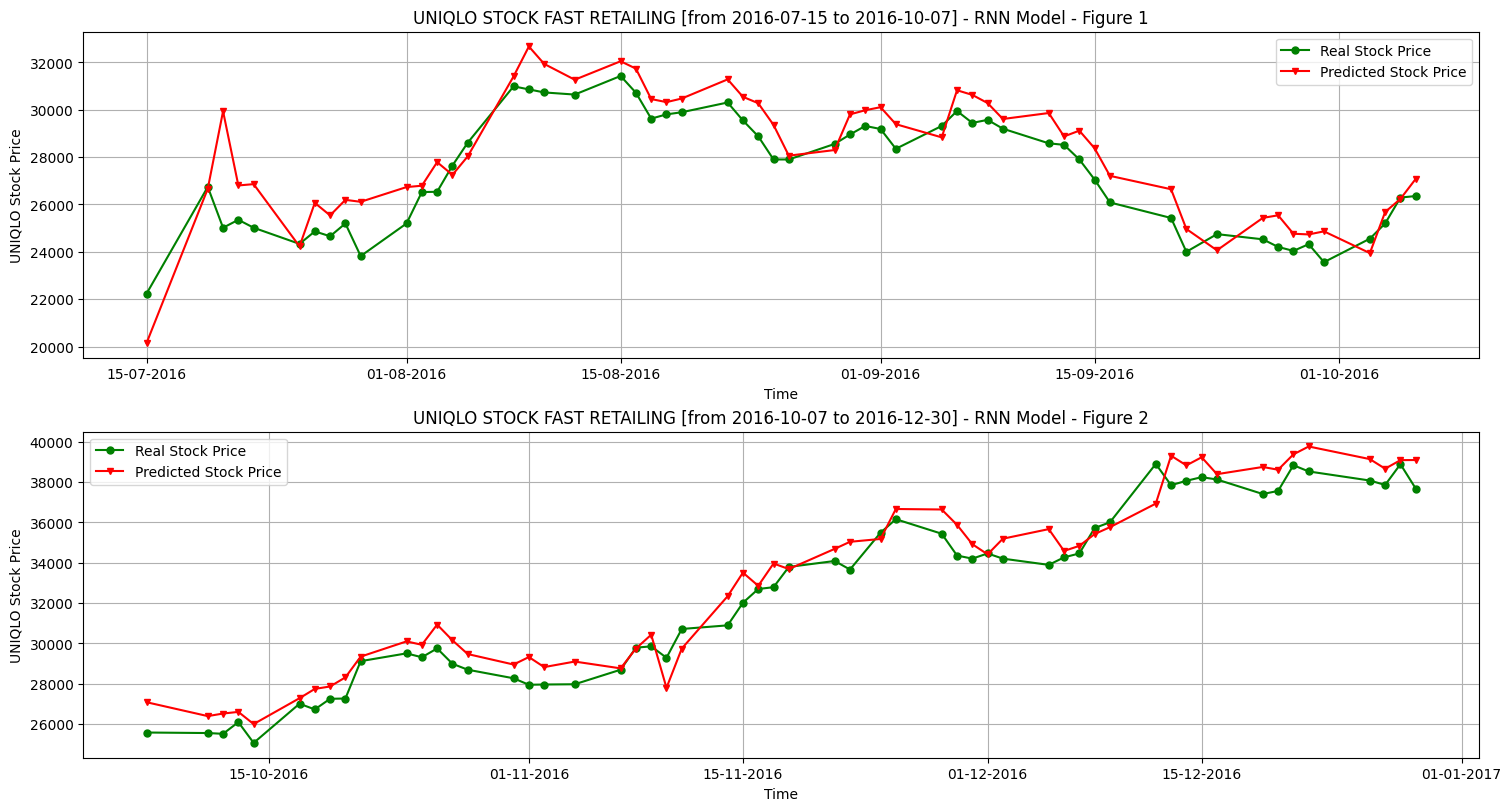

In [82]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15,4*fig_num], nrows=fig_num, ncols=1, layout='constrained')
test_len = y_pred_rnn.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i+1) if i != fig_num-1 else test_len -1
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [from {test_date[start].date()} to {test_date[end].date()}] - RNN Model - Figure {i+1}')
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax[i].plot(test_date[start:end], y_true[start:end], color = 'green', marker='o', markersize=5, label = "Real Stock Price")
    ax[i].plot(test_date[start:end], y_pred_rnn[start:end], color = 'red', marker='v', markersize=5, label = "Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')
    ax[i].grid(True)
fig.savefig('RNN prediction')

# 5.FFNN

## 5.1 Modeling

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten

# Modeling
FFN = Sequential(layers=
    [
        Flatten(input_shape=(X_train.shape[1], 6)),  # Flatten the input
        Dense(units=no_unit, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(units=no_unit, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(units=no_unit, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(units=1)
    ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
FFN.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [85]:
# Summary of the FFNN model
FFN.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          60,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,601 (318.75 KB)

 Trainable params: 81,001 (316.41 KB)

 Non-trainable params: 600 (2.34 KB)

## 5.2 Training Progress

In [86]:
# Fitting train data
no_epoch = 100
batch_size = 32
validation_split = 0.2
start = datetime.datetime.now()
history_ffnn = FFN.fit(X_train, y_train, validation_split=validation_split,
                      epochs = no_epoch, batch_size = batch_size, verbose=1)
end = datetime.datetime.now()
FFNN_training_time =  end-start
print("Total execution time: ", FFNN_training_time)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 2.0834 - mae: 1.0800 - val_loss: 0.0314 - val_mae: 0.1400
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3729 - mae: 0.8798 - val_loss: 0.3521 - val_mae: 0.5846
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8764 - mae: 0.7139 - val_loss: 0.3213 - val_mae: 0.5578
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6734 - mae: 0.6108 - val_loss: 0.0899 - val_mae: 0.2915
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6624 - mae: 0.5890 - val_loss: 0.0061 - val_mae: 0.0612
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4745 - mae: 0.5209 - val_loss: 0.0623 - val_mae: 0.2418
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5289 - mae: 0.5539 - val_loss: 0.0545 - val_mae: 0.2220
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4770 - mae: 0.4965 - val_loss: 0.0346 - val_mae: 0.1529
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.32

## 5.3 FFNN Prediction

In [87]:
start = datetime.datetime.now()
y_pred_ffnn = FFN.predict(X_test)
y_pred_ffnn = restore_ground_val(y_pred_ffnn, max_open)
y_true =  restore_ground_val(y_test, max_open)
print(y_pred_ffnn.shape)
end = datetime.datetime.now()
FFNN_test_time =  end-start
print("Total test time: ", FFNN_test_time)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
(113, 1)
Total test time:  0:00:00.685913


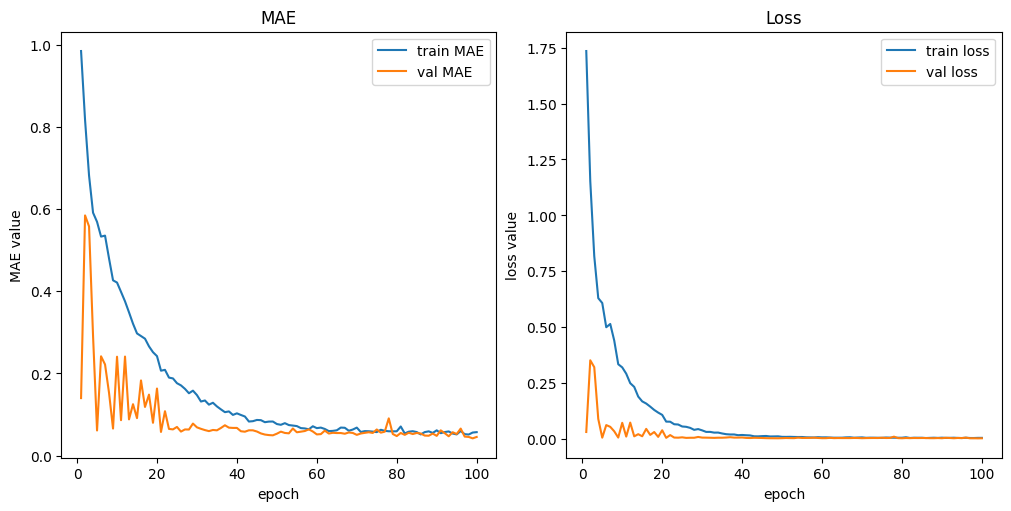

In [88]:
fig1, ax1 = plt.subplots(figsize=[10,5], nrows=1, ncols=2, layout='constrained')
x_axis = range(1, no_epoch+1)

# training accuracy
ax1[0].set_title("MAE")
ax1[0].plot(x_axis, history_ffnn.history['mae'], label = "train MAE")
ax1[0].plot(x_axis, history_ffnn.history['val_mae'], label = "val MAE")
ax1[0].set_xlabel('epoch')
ax1[0].set_ylabel('MAE value')
ax1[0].legend()

# training loss
ax1[1].set_title("Loss")
ax1[1].plot(x_axis,history_ffnn.history['loss'], label = "train loss")
ax1[1].plot(x_axis,history_ffnn.history['val_loss'], label = "val loss")
ax1[1].set_xlabel('epoch')
ax1[1].set_ylabel('loss value')
ax1[1].legend()

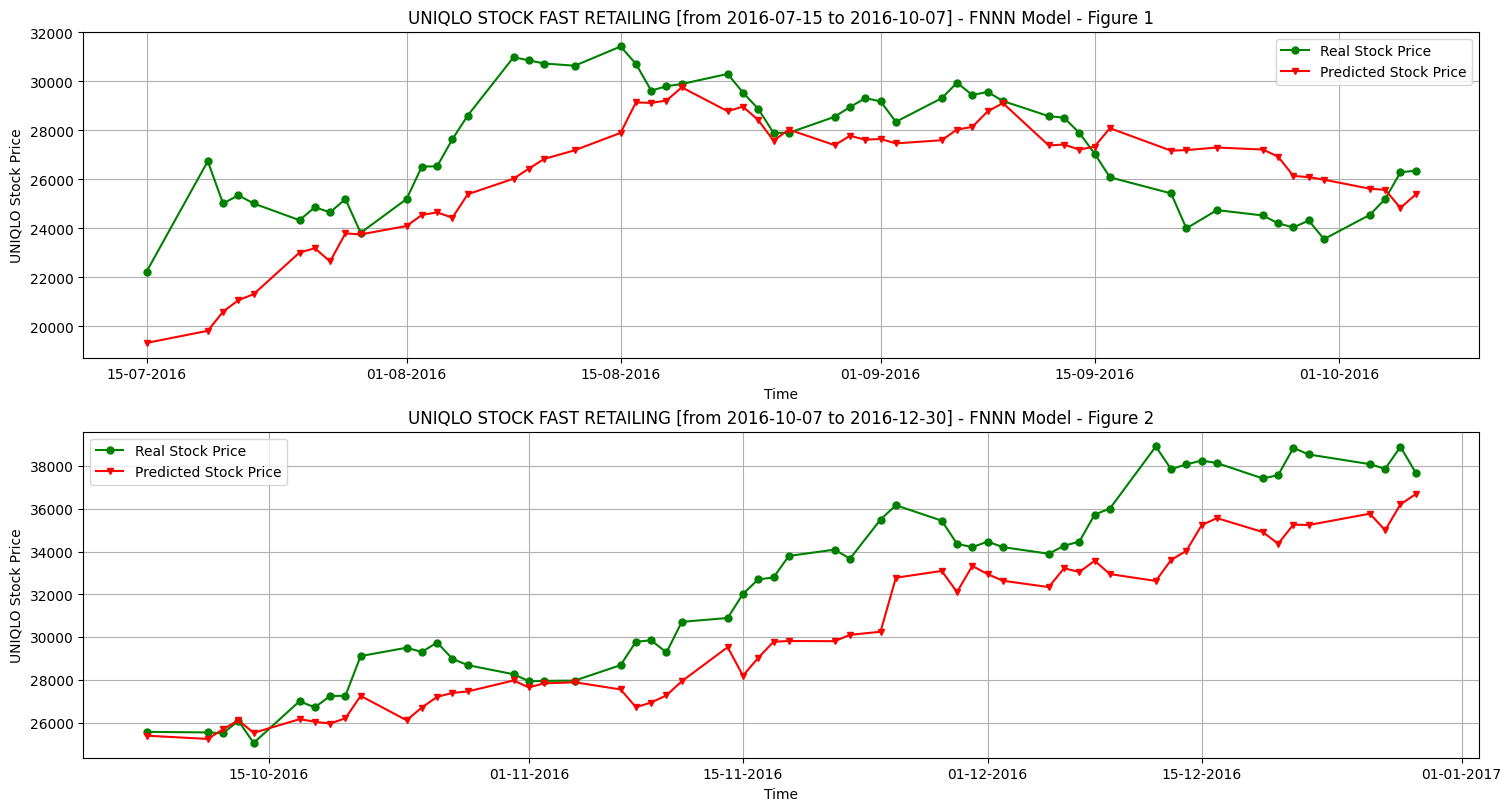

In [89]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15,4*fig_num], nrows=fig_num, ncols=1, layout='constrained')
test_len = y_pred_ffnn.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i+1) if i != fig_num-1 else test_len -1
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [from {test_date[start].date()} to {test_date[end].date()}] - FNNN Model - Figure {i+1}')
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax[i].plot(test_date[start:end], y_true[start:end], color = 'green', marker='o', markersize=5, label = "Real Stock Price")
    ax[i].plot(test_date[start:end], y_pred_ffnn[start:end], color = 'red', marker='v', markersize=5, label = "Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')
    ax[i].grid(True)
fig.savefig('FFNN prediction')

# 6.MLP

## 6.1 Modeling

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten  # Import Flatten layer

In [91]:
start = datetime.datetime.now()
# Reshaping the input to fit the model
n_step = 100  # Assuming this is the number of time steps
n_features = 6  # Assuming this is the number of features

# Creating the model
MLP = Sequential([
    Flatten(input_shape=(n_step, n_features)),  # Flatten the input to fit Dense layers
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.3),
    Dense(units=1)
])

# Compiling the model
MLP.compile(optimizer='adam', loss='mse', metrics=["mae"])

In [92]:
MLP.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          76,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,193 (344.50 KB)

 Trainable params: 87,745 (342.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [93]:
# Fitting train data
no_epoch = 100
batch_size = 32
validation_split = 0.2

history_mlp = MLP.fit(x=X_train,y=y_train,
    validation_split=validation_split,
    epochs = no_epoch,
    batch_size = batch_size,
    verbose = 1
)
end = datetime.datetime.now()
MLP_training_time =  end-start
print("Total execution time: ", MLP_training_time)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 2.7374 - mae: 1.3088 - val_loss: 1.3046 - val_mae: 1.1123
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0107 - mae: 0.7903 - val_loss: 0.6708 - val_mae: 0.7836
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7010 - mae: 0.6505 - val_loss: 0.4153 - val_mae: 0.6000
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5837 - mae: 0.6056 - val_loss: 0.3294 - val_mae: 0.5000
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5629 - mae: 0.5789 - val_loss: 0.3572 - val_mae: 0.5150
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5350 - mae: 0.5630 - val_loss: 0.1100 - val_mae: 0.2733
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3949 - mae: 0.4781 - val_loss: 0.1045 - val_mae: 0.2562
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4553 - mae: 0.5016 - val_loss: 0.1405 - val_mae: 0.2978
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.37

## 6.2 Training Progress

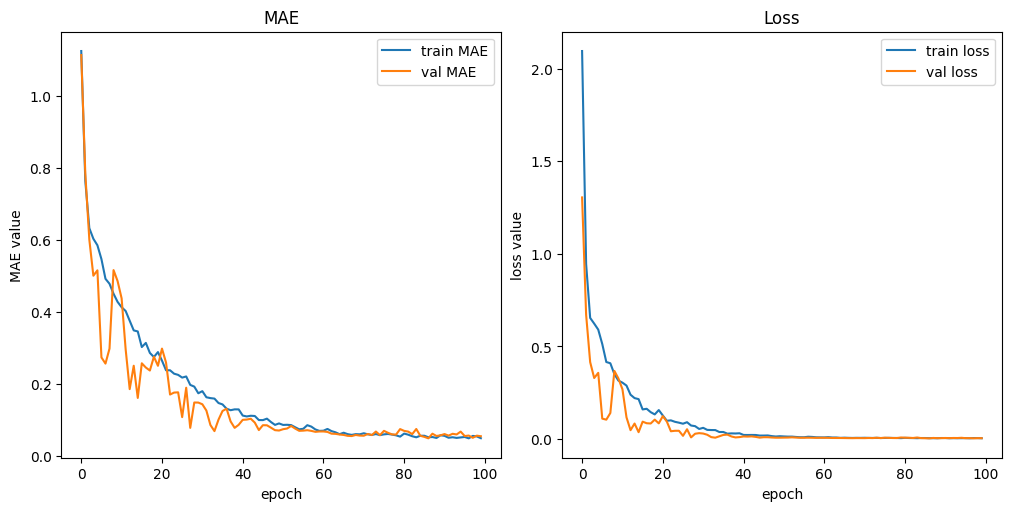

In [94]:
fig2, ax2 = plt.subplots(figsize=[10,5], nrows=1, ncols=2, layout='constrained')
# training accuracy
ax2[0].set_title("MAE")
ax2[0].plot(history_mlp.history['mae'], label = "train MAE")
ax2[0].plot(history_mlp.history['val_mae'], label = "val MAE")
ax2[0].set_xlabel('epoch')
ax2[0].set_ylabel('MAE value')
ax2[0].legend()

# training loss
ax2[1].set_title("Loss")
ax2[1].plot(history_mlp.history['loss'], label = "train loss")
ax2[1].plot(history_mlp.history['val_loss'], label = "val loss")
ax2[1].set_xlabel('epoch')
ax2[1].set_ylabel('loss value')
ax2[1].legend()

## 6.3 MLP Prediction

In [95]:
start = datetime.datetime.now()
y_pred_mlp = MLP.predict(X_test)
y_pred_mlp = restore_ground_val(y_pred_mlp, max_open)
y_true = restore_ground_val(y_test, max_open)
print(y_pred_mlp.shape)
end = datetime.datetime.now()
MLP_test_time =  end-start
print("Total test time: ", MLP_test_time)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
(113, 1)
Total test time:  0:00:00.678907


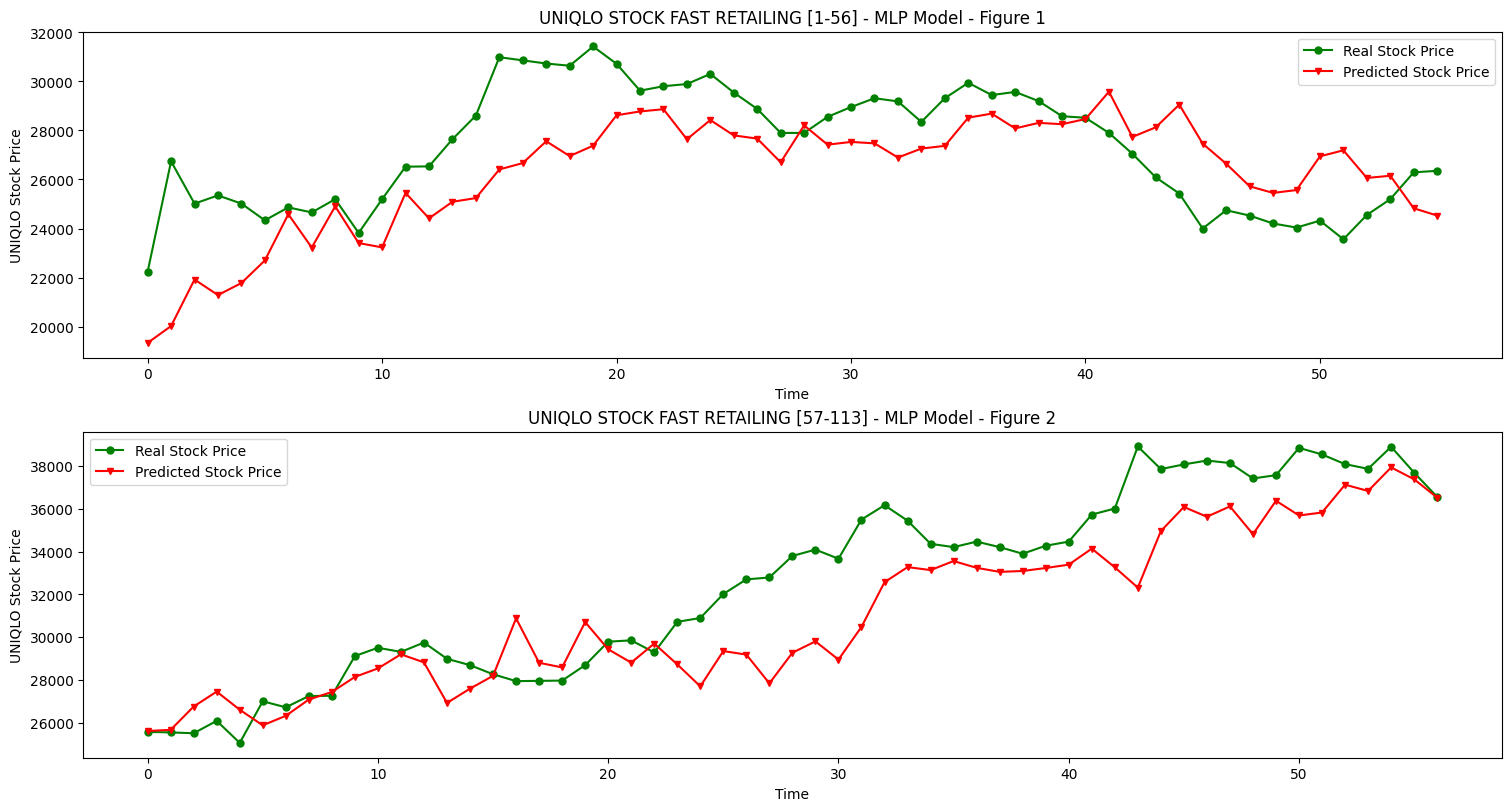

In [96]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15,4*fig_num], nrows=fig_num, ncols=1, layout='constrained')
test_len = y_pred_mlp.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i+1) if i != fig_num-1 else test_len
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [{start+1}-{end}] - MLP Model - Figure {i+1}')
    ax[i].plot(y_true[start:end], color = 'green', marker='o', markersize=5, label = "Real Stock Price")
    ax[i].plot(y_pred_mlp[start:end], color = 'red', marker='v', markersize=5, label = "Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')
fig.savefig('MLP prediction')


# 7.LSTM

In [97]:
from keras.layers import LSTM, Bidirectional

### 7.1 Modeling

In [98]:
# Modeling
start = datetime.datetime.now()
no_unit = 50
LSTM = Sequential(layers=
    [
        Bidirectional(layer =
            LSTM(units=no_unit, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 6))
        ),
        Bidirectional(layer =
            LSTM(units=no_unit, activation='relu', return_sequences=True)
        ),
        Bidirectional(layer =
            LSTM(units=no_unit, activation='relu', return_sequences=False)
        ),
        Dense(units = 1)
    ]
)

In [99]:
# Build the model by calling it on a sample batch of data
LSTM.build(input_shape=(batch_size, X_train.shape[1], 6))

In [100]:
# Compiling
LSTM.compile(optimizer='adam', loss = 'mse', metrics=["mae"])
# LSTM.summary()

In [101]:
LSTM.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional)      │ (32, 100, 100)              │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (32, 100, 100)              │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (32, 100)                   │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (32, 1)                     │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,701 (561.33 KB)

 Trainable params: 143,701 (561.33 KB)

 Non-trainable params: 0 (0.00 B)

### 7.2 Training Progress

In [102]:
no_epoch = 100
batch_size = 32
validation_split = 0.2

history_lstm = LSTM.fit(X_train, y_train, validation_split=validation_split,
                        epochs = no_epoch, batch_size = batch_size)
end = datetime.datetime.now()
LSTM_training_time =  end-start
print("Total execution time: ", LSTM_training_time)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - loss: 0.1376 - mae: 0.2954 - val_loss: 0.0138 - val_mae: 0.1015
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0097 - mae: 0.0828 - val_loss: 0.0710 - val_mae: 0.2572
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0057 - mae: 0.0603 - val_loss: 0.0214 - val_mae: 0.1351
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0031 - mae: 0.0430 - val_loss: 0.0095 - val_mae: 0.0832
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0020 - mae: 0.0340 - val_loss: 0.0086 - val_mae: 0.0788
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0020 - mae: 0.0332 - val_loss: 0.0063 - val_mae: 0.0677
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0014 - mae: 0.0280 - val_loss: 0.0044 - val_mae: 0.0545
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0017 - mae: 0.0303 - val_loss: 0.0029 - val_mae: 0.0441
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - 

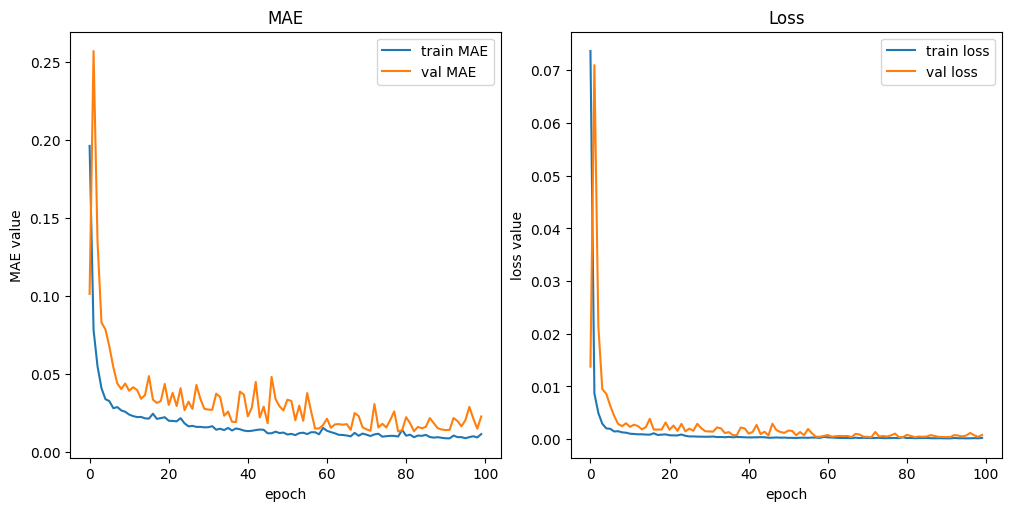

In [103]:
fig3, ax3 = plt.subplots(figsize=[10,5], nrows=1, ncols=2, layout='constrained')
# training accuracy
ax3[0].set_title("MAE")
ax3[0].plot(history_lstm.history['mae'], label = "train MAE")
ax3[0].plot(history_lstm.history['val_mae'], label = "val MAE")
ax3[0].set_xlabel('epoch')
ax3[0].set_ylabel('MAE value')
ax3[0].legend()

# training loss
ax3[1].set_title("Loss")
ax3[1].plot(history_lstm.history['loss'], label = "train loss")
ax3[1].plot(history_lstm.history['val_loss'], label = "val loss")
ax3[1].set_xlabel('epoch')
ax3[1].set_ylabel('loss value')
ax3[1].legend()

## 7.3 LSTM Prediction

In [104]:
start = datetime.datetime.now()
y_pred_lstm = LSTM.predict(X_test)
y_pred_lstm = restore_ground_val(y_pred_lstm, max_open)
y_true =  restore_ground_val(y_test, max_open)
print(y_pred_lstm.shape)
end = datetime.datetime.now()
LSTM_test_time =  end-start
print("Total test time: ", LSTM_test_time)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step
(113, 1)
Total test time:  0:00:05.165168


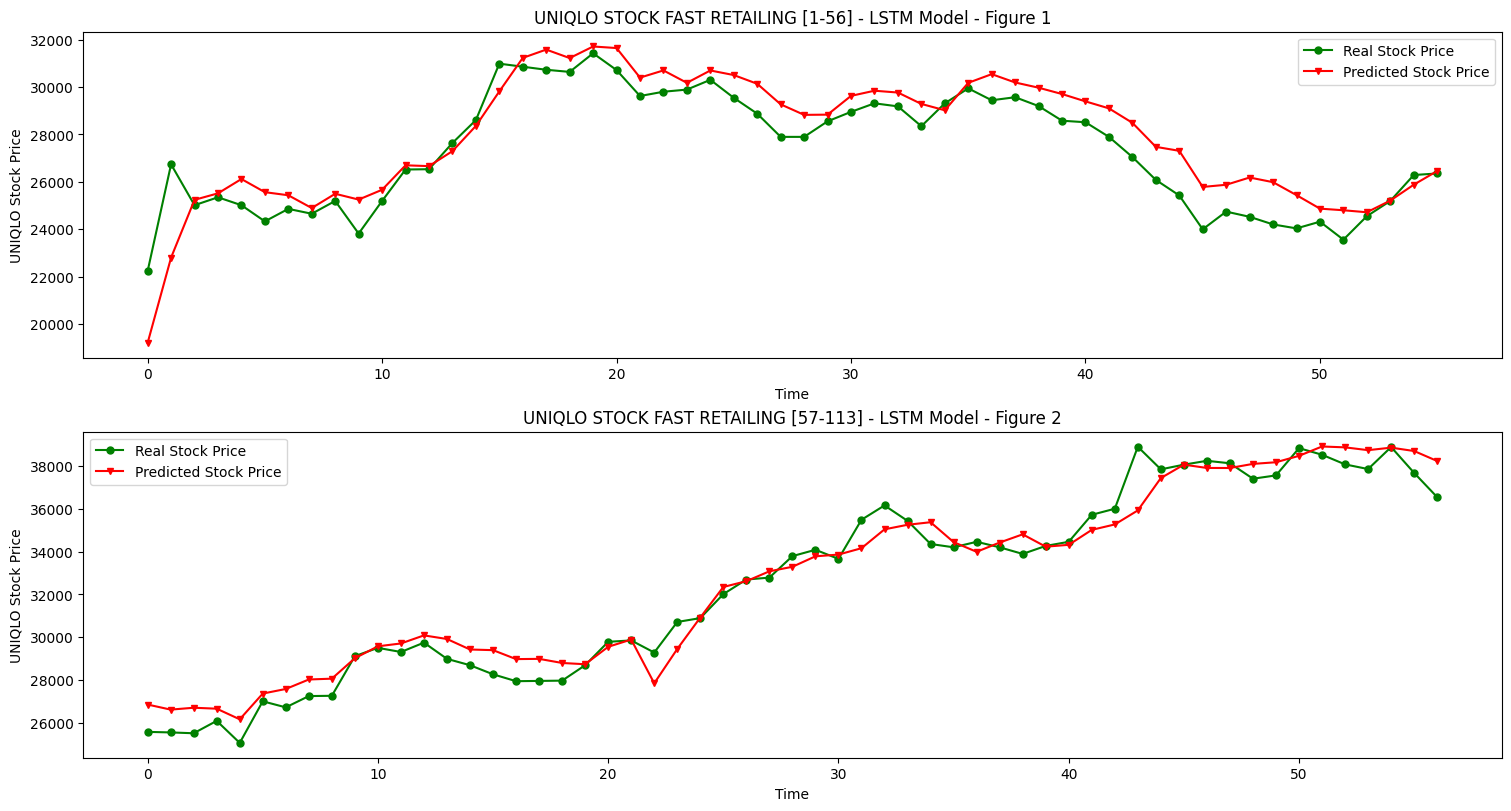

In [105]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15,4*fig_num], nrows=fig_num, ncols=1, layout='constrained')
test_len = y_pred_lstm.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i+1) if i != fig_num-1 else test_len
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [{start+1}-{end}] - LSTM Model - Figure {i+1}')
    ax[i].plot(y_true[start:end], color = 'green', marker='o', markersize=5, label = "Real Stock Price")
    ax[i].plot(y_pred_lstm[start:end], color = 'red', marker='v', markersize=5, label = "Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')
fig.savefig('LSTM prediction')

# 8.Compare training & testing time of 4 models

In [106]:
train_times = [x.total_seconds() for x in  [RNN_training_time,
                                            FFNN_training_time,
                                            MLP_training_time,
                                            LSTM_training_time]]
test_times = [x.total_seconds() for x in [RNN_test_time,
                                          FFNN_test_time,
                                          MLP_test_time,
                                          LSTM_test_time]]
model_names = [ "RNN", "FFNN","MLP","LSTM"]
comparation = pd.DataFrame([train_times, test_times], index=["train", "test"], columns = model_names)

In [107]:
comparation

RNN       FFNN        MLP        LSTM
train  113.340353  21.962845  21.192987  239.719907
test     1.019909   0.685913   0.678907    5.165168

Text(0, 0.5, 'time in second')

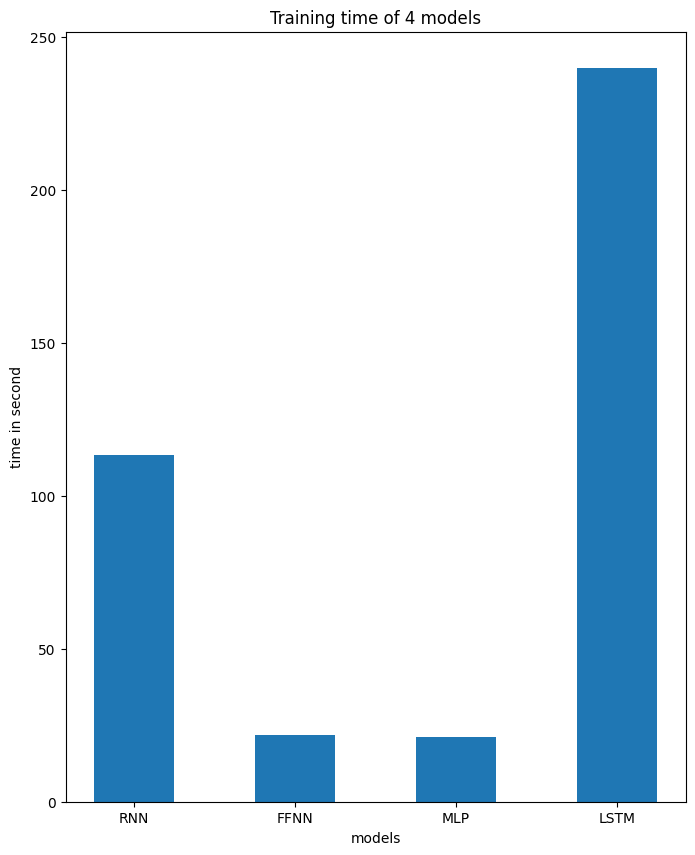

In [108]:
plt.figure(figsize=[8, 10])
plt.bar(x=model_names, height=train_times, width = 0.5)
plt.title("Training time of 4 models")
plt.xlabel("models")
plt.ylabel("time in second")

Text(0, 0.5, 'time in second')

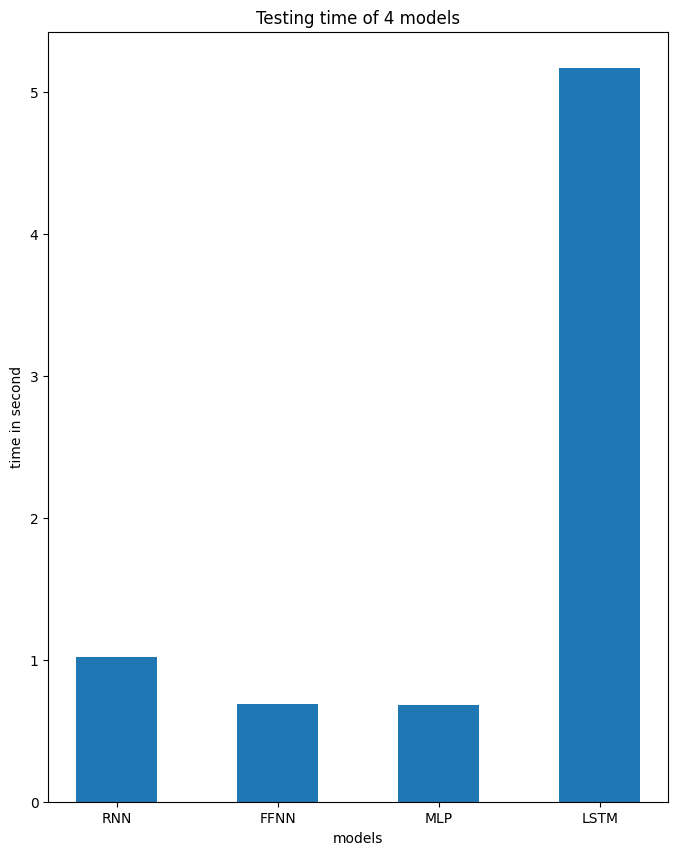

In [109]:
plt.figure(figsize=[8, 10])
plt.bar(x=model_names, height=test_times, width = 0.5)
plt.title("Testing time of 4 models")
plt.xlabel("models")
plt.ylabel("time in second")

# 9.Compare MSE, MAE of 4 models

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_preds = [y_pred_rnn, y_pred_ffnn, y_pred_mlp, y_pred_lstm]
mse = []
mae = []
for y_pred in y_preds:
    mse += [mean_squared_error(y_pred=y_pred,y_true= y_true, squared=False)]
    mae += [mean_absolute_error(y_pred=y_pred,y_true= y_true)]

Text(37.097222222222214, 0.5, 'MAE and MSE metric')

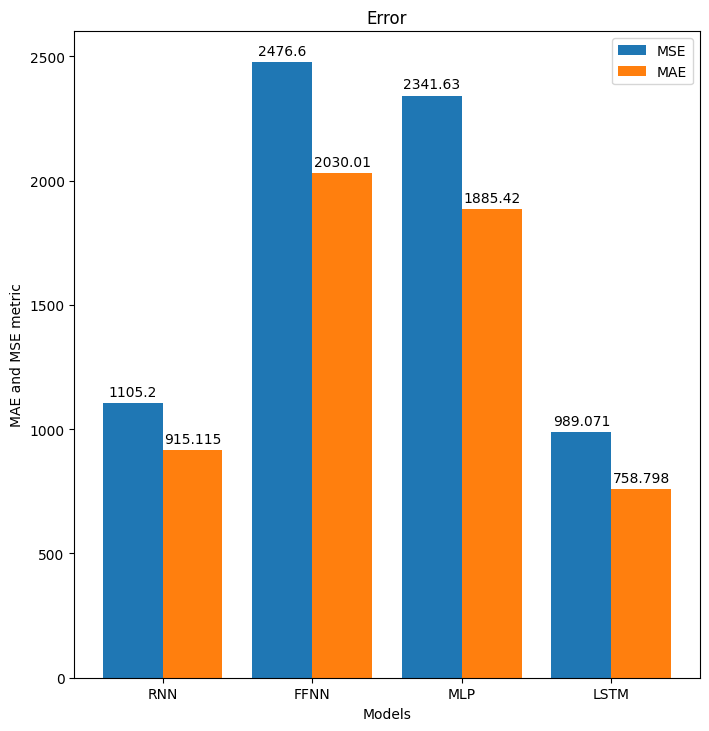

In [111]:
x = np.arange(len(mse))
width = 0.4

plt.figure(figsize=[7,7])
c1 = plt.bar(x - width/2, mse, width = width, label = "MSE")
c2 = plt.bar(x + width/2, mae, width = width, label = "MAE")

plt.bar_label(c1, padding=3)
plt.bar_label(c2, padding=3)

plt.tight_layout()
plt.xticks(x,["RNN", "FFNN", "MLP", "LSTM"])
plt.legend()
plt.title("Error")
plt.xlabel("Models")
plt.ylabel("MAE and MSE metric")